<a href="https://colab.research.google.com/github/Jg-Nascimento/trading/blob/master/GoogleStockPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Link de Apoio](https://www.agatetepe.com.br/predicao-do-mercado-de-acoes-pela-rede-neural-recorrente-no-modelo-lstm/)

---
# **Prevendo de Preço de Ações com RNN e LSTM**
---

Instalação e Configuração

In [ ]:
#!pip install tensorflow-gpu

In [ ]:
import tensorflow as tf
import numpy as np
import pandas_datareader as web
import pandas as pd 
import matplotlib.pyplot as plt

Processando os dados

In [ ]:
'''#importando o dataset
from google.colab import files
upload = files.upload()'''

'#importando o dataset\nfrom google.colab import files\nupload = files.upload()'

In [ ]:
#training_data = pd.read_excel('estoque.xlsx')

#Get the stock quote 
ativo = input("Ativo para análise: ")
training_data = web.DataReader(ativo, data_source='yahoo', 
                    start='2012-01-01', end='2020-11-28') 
#Show the data 
training_data

Ativo para análise: ^GSPC


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,1284.619995,1258.859985,1258.859985,1277.060059,3943710000,1277.060059
2012-01-04,1278.729980,1268.099976,1277.030029,1277.300049,3592580000,1277.300049
2012-01-05,1283.050049,1265.260010,1277.300049,1281.060059,4315950000,1281.060059
2012-01-06,1281.839966,1273.339966,1280.930054,1277.810059,3656830000,1277.810059
2012-01-09,1281.989990,1274.550049,1277.829956,1280.699951,3371600000,1280.699951
...,...,...,...,...,...,...
2020-11-20,3581.229980,3556.850098,3579.310059,3557.540039,4218970000,3557.540039
2020-11-23,3589.810059,3552.770020,3566.820068,3577.590088,5036290000,3577.590088
2020-11-24,3642.310059,3594.520020,3594.520020,3635.409912,6267570000,3635.409912


In [ ]:
training_data.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,1284.619995,1258.859985,1258.859985,1277.060059,3943710000,1277.060059
2012-01-04,1278.729980,1268.099976,1277.030029,1277.300049,3592580000,1277.300049
2012-01-05,1283.050049,1265.260010,1277.300049,1281.060059,4315950000,1281.060059
2012-01-06,1281.839966,1273.339966,1280.930054,1277.810059,3656830000,1277.810059
2012-01-09,1281.989990,1274.550049,1277.829956,1280.699951,3371600000,1280.699951


In [ ]:
training_data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-11-20,3581.229980,3556.850098,3579.310059,3557.540039,4218970000,3557.540039
2020-11-23,3589.810059,3552.770020,3566.820068,3577.590088,5036290000,3577.590088
2020-11-24,3642.310059,3594.520020,3594.520020,3635.409912,6267570000,3635.409912
2020-11-25,3635.500000,3617.760010,3635.500000,3629.649902,4902560000,3629.649902
2020-11-27,3644.310059,3629.330078,3638.550049,3638.350098,2778450000,3638.350098


In [ ]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2242 entries, 2012-01-03 to 2020-11-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2242 non-null   float64
 1   Low        2242 non-null   float64
 2   Open       2242 non-null   float64
 3   Close      2242 non-null   float64
 4   Volume     2242 non-null   int64  
 5   Adj Close  2242 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 122.6 KB


In [ ]:
training_set = training_data.iloc[:, 1:2].values

In [ ]:
training_set.shape, training_data.shape

((2242, 1), (2242, 6))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
  

In [ ]:
training_set_scaled

array([[0.        ],
       [0.00389796],
       [0.0026999 ],
       ...,
       [0.98531512],
       [0.99511908],
       [1.        ]])

In [ ]:
#criar estrutura de dados com 60 timestamp e 1 output
x_train = []
y_train = []

for i in range(60, 2242):
  x_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])

#convertendo x_tain, y_train em array np
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train

array([[0.        , 0.00389796, 0.0026999 , ..., 0.05832177, 0.06458211,
        0.05835972],
       [0.00389796, 0.0026999 , 0.00610848, ..., 0.06458211, 0.05835972,
        0.05598049],
       [0.0026999 , 0.00610848, 0.00661897, ..., 0.05835972, 0.05598049,
        0.06013999],
       ...,
       [0.94259363, 0.94316318, 0.96030319, ..., 0.96393543, 0.96942379,
        0.96770258],
       [0.94316318, 0.96030319, 0.91481851, ..., 0.96942379, 0.96770258,
        0.98531512],
       [0.96030319, 0.91481851, 0.88200644, ..., 0.96770258, 0.98531512,
        0.99511908]])

In [ ]:
y_train

array([0.05598049, 0.06013999, 0.06142241, ..., 0.98531512, 0.99511908,
       1.        ])

In [ ]:
x_train.shape

(2182, 60)

In [ ]:
#reshaping dataset
x_train = x_train.reshape(2182, 60, 1)

Criando a LSTM

In [ ]:
#definindo um objeto(inicializando RNN)
model = tf.keras.models.Sequential()

In [ ]:
#primeiro LSTM layer
model.add(tf.keras.layers.LSTM(units=60, 
                               activation='relu', return_sequences=True,
                               input_shape=(60, 1)))
model.add(tf.keras.layers.Dropout(0.2))

#segundo LSTM layer
model.add(tf.keras.layers.LSTM(units=80, 
                               activation='relu', return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))

#quarto LSTM layer
model.add(tf.keras.layers.LSTM(units=120, 
                               activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

In [ ]:
#saida
model.add(tf.keras.layers.Dense(units=1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 60)            14880     
_________________________________________________________________
dropout (Dropout)            (None, 60, 60)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 120)               96480     
_________________________________________________________________
dropout_2 (Dropout)          (None, 120)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1

In [ ]:
#compilando o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

Treinando o Modelo

In [ ]:
#epochs será o tempo (passada) que o modelo terá de treino
model.fit(x_train, y_train, batch_size=32, 
          epochs=2) 

Epoch 1/2
69/69 [==============================] - 18s 261ms/step - loss: 0.0025
Epoch 2/2
69/69 [==============================] - 18s 261ms/step - loss: 0.0024


Fazendo as Predições

In [ ]:
#obtendo o valor real
#test_data = pd.read_excel('estoque.xlsx')
test_data = web.DataReader(ativo, data_source='yahoo', 
                    start='2012-01-01', end='2020-11-29') 

In [ ]:
test_data.shape

(2242, 6)

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2242 entries, 2012-01-03 to 2020-11-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2242 non-null   float64
 1   Low        2242 non-null   float64
 2   Open       2242 non-null   float64
 3   Close      2242 non-null   float64
 4   Volume     2242 non-null   int64  
 5   Adj Close  2242 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 122.6 KB


In [ ]:
real_stock_price = test_data.iloc[:, 1:2].values

In [ ]:
real_stock_price.shape

(2242, 1)

In [ ]:
#Obtendo as Previsões
#concatenação
dataset_total = pd.concat((training_data['Close'],
                           test_data['Close']), axis=0)

#Preço predito de 60 dias
inputs = dataset_total[len(dataset_total) - len(test_data) - 60:].values

#reshape (convert em array numpy)
inputs = inputs.reshape(-1, 1)

#feature scaling
inputs = sc.transform(inputs)

#criando um set de teste
x_test = []
for i in range(60, 80):
  x_test.append(inputs[i-60:i, 0])

x_test = np.array(x_test)

#convertendo em 3d (requerido para processo)
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

#obtendo o valor predito 
predicted_stock_price = model.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


In [ ]:
print("Predição", predicted_stock_price[3]), print("Valor Real", real_stock_price[3])

Predição [3389.6287]
Valor Real [1273.33996582]


(None, None)

Visualizção dos Resultados

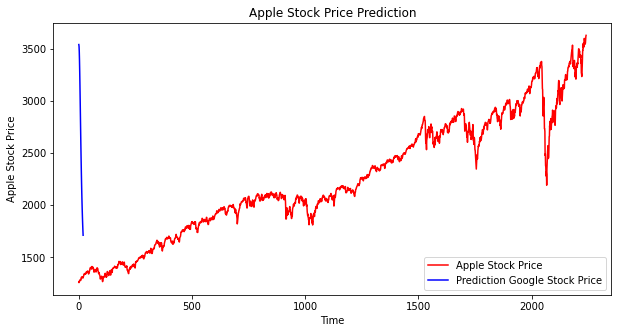

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(real_stock_price, color='red', label='Apple Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Prediction Google Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()